### Imbalance filter by mFRR

In [ ]:
# Interprete Pearson http://purpledreams.com/~mike/math_studies_11/statistics_08.pdf

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pt
import seaborn as sns
from scipy.stats import ttest_ind

In [2]:
GER = pd.read_csv("GER.csv",parse_dates=True,index_col='Timestamp')

In [3]:
GER

GER_im_pow_MW  GER_imba_price_EURMwh  \
Timestamp                                                   
2015-01-01 00:00:00       -464.583                 -49.41   
2015-01-01 00:15:00       -171.409                 -19.69   
2015-01-01 00:30:00        157.958                  74.70   
2015-01-01 00:45:00        142.199                  62.28   
2015-01-01 01:00:00        460.380                  63.71   
2015-01-01 01:15:00        502.827                  79.32   
2015-01-01 01:30:00        321.097                  74.09   
2015-01-01 01:45:00        101.588                  72.77   
2015-01-01 02:00:00        225.518                  69.77   
2015-01-01 02:15:00         32.674                 115.22   
2015-01-01 02:30:00        -42.379                 -17.84   
2015-01-01 02:45:00       -153.145                 -33.52   
2015-01-01 03:00:00         60.731                 105.04   
2015-01-01 03:15:00        -18.329                  -7.15   
2015-01-01 03:30:00         32.424                  57.64   
2015-01-01 03:45:00       -145.705                 -20.63   
2015-01-01 04:00:00        -25.795                 -68.55   
2015-01-01 04:15:00       -164.662                  -9.74   
2015-01-01 04:30:00       -260.163                 -29.91   
2015-01-01 04:45:00       -402.780                 -64.45   
2015-01-01 05:00:00       -191.895                 -27.10   
2015-01-01 05:15:00       -250.164                 -36.23   
2015-01-01 05:30:00       -272.386                 -42.39   
2015-01-01 05:45:00       -223.369                 -72.76   
2015-01-01 06:00:00       -310.396                 -57.72   
2015-01-01 06:15:00       -265.308                 -60.09   
2015-01-01 06:30:00       -450.560                 -68.70   
2015-01-01 06:45:00       -597.585                 -73.94   
2015-01-01 07:00:00       -301.545                -355.87   
2015-01-01 07:15:00       -196.666                 -52.47   
...                            ...                    ...   
2019-12-31 16:30:00        496.563                  51.30   
2019-12-31 16:45:00        162.336                  81.33   
2019-12-31 17:00:00        657.147                  47.43   
2019-12-31 17:15:00        224.912                  50.61   
2019-12-31 17:30:00       -185.903                  22.80   
2019-12-31 17:45:00       -490.817                  17.73   
2019-12-31 18:00:00       -975.040                  11.98   
2019-12-31 18:15:00       -873.975                  12.37   
2019-12-31 18:30:00       -582.932                  12.26   
2019-12-31 18:45:00       -798.003                   5.35   
2019-12-31 19:00:00       -597.044                  25.98   
2019-12-31 19:15:00       -728.104                  11.88   
2019-12-31 19:30:00       -554.825                  11.10   
2019-12-31 19:45:00       -524.520                  18.13   
2019-12-31 20:00:00       -366.016                  19.89   
2019-12-31 20:15:00       -385.965                  19.01   
2019-12-31 20:30:00         36.959                  39.40   
2019-12-31 20:45:00         90.516                  39.40   
2019-12-31 21:00:00       -334.586                  17.03   
2019-12-31 21:15:00       -238.884                  26.43   
2019-12-31 21:30:00        -58.129                  24.97   
2019-12-31 21:45:00       -329.493                   7.57   
2019-12-31 22:00:00       -373.563                  -1.86   
2019-12-31 22:15:00       -446.744                 -13.52   
2019-12-31 22:30:00       -136.968                   5.08   
2019-12-31 22:45:00        104.735                  48.56   
2019-12-31 23:00:00        397.050                  85.61   
2019-12-31 23:15:00       1069.768                  60.76   
2019-12-31 23:30:00       1189.780                 117.97   
2019-12-31 23:45:00        779.656                 160.40   

                     GER_aFRR_pow_down_MW  GER_aFRR_pow_up_MW  \
Timestamp                                                       
2015-01-01 00:00:00               389.996      

In [4]:
#new dataframe for undercover balancing analysis
GER_undercover = pd.DataFrame()
GER_undercover["German ACE in MW"] = GER["GER_im_pow_MW"]
#GER_undercover["Difference of ACE to ACE in last ISP in MW"] = GER["GER_im_pow"] - GER["GER_im_pow"].shift(1)
GER_undercover["Difference of ACE to ACE in next ISP in MW"] = GER["GER_im_pow_MW"].shift(-1) - GER["GER_im_pow_MW"]
GER_undercover["mFRR up"] = GER["GER_mFRR_pow_up_MW"]
GER_undercover["mFRR down"] = GER["GER_mFRR_pow_down_MW"]

#new column with mFRR activation yes or no - looking if mFRR is present in next ISP!
GER_undercover['mFRR activation up'] = np.where(GER_undercover['mFRR up'].shift(-1)==0, 'no', 'yes')
GER_undercover['mFRR activation down'] = np.where(GER_undercover['mFRR down'].shift(-1)==0, 'no', 'yes')

In [5]:
GER_undercover.loc[GER_undercover["German ACE in MW"]>1000].head()

German ACE in MW  \
Timestamp                               
2015-01-03 14:30:00          1042.887   
2015-01-07 09:00:00          1040.862   
2015-01-07 09:15:00          1072.418   
2015-01-07 23:15:00          1050.554   
2015-01-09 19:00:00          1024.497   

                     Difference of ACE to ACE in next ISP in MW  mFRR up  \
Timestamp                                                                  
2015-01-03 14:30:00                                    -361.482      0.0   
2015-01-07 09:00:00                                      31.556      0.0   
2015-01-07 09:15:00                                    -974.385      0.0   
2015-01-07 23:15:00                                    -144.468   1002.0   
2015-01-09 19:00:00                                    -472.592    400.0   

                     mFRR down mFRR activation up mFRR activation down  
Timestamp                                                               
2015-01-03 14:30:00        0.0                 no                   no  
2015-01-07 09:00:00        0.0                 no                   no  
2015-01-07 09:15:00        0.0                 no                   no  
2015-01-07 23:15:00        0.0                yes                   no  
2015-01-09 19:00:00        0.0                yes                   no

In [6]:
GER_undercover['2015-01-07 23h'].head()

German ACE in MW  \
Timestamp                               
2015-01-07 23:00:00           892.984   
2015-01-07 23:15:00          1050.554   
2015-01-07 23:30:00           906.086   
2015-01-07 23:45:00           867.269   

                     Difference of ACE to ACE in next ISP in MW  mFRR up  \
Timestamp                                                                  
2015-01-07 23:00:00                                     157.570      0.0   
2015-01-07 23:15:00                                    -144.468   1002.0   
2015-01-07 23:30:00                                     -38.817    512.0   
2015-01-07 23:45:00                                    -432.604    512.0   

                     mFRR down mFRR activation up mFRR activation down  
Timestamp                                                               
2015-01-07 23:00:00        0.0                yes                   no  
2015-01-07 23:15:00        0.0                yes                   no  
2015-01-07 23:30:00        0.0                yes                   no  
2015-01-07 23:45:00        0.0                 no                   no

## Analysis under-cover balancing in Germany for Energy Policy

In [11]:
#loop to create new dataframes with positive imbalance in 100 MW increments
index=[]
imba=[]
GER_increments_100MW_imba = pd.DataFrame()
uc_imba = []
uc_imba_with_mFRR = []
uc_imba_no_mFRR = []
uc_imba_test_mFRR = []

#uc_imba_with_mFRR_down = []
#uc_imba_no_mFRR_down = []
#uc_imba_test_mFRR_down = []

uc_diff = []
uc_diff_with_mFRR = []
uc_diff_no_mFRR = []
uc_diff_test_mFRR = []

#uc_diff_with_mFRR_down = []
#uc_diff_no_mFRR_down = []
#uc_diff_test_mFRR_down = []

d = []
d_result = []

imba_1 = 0
imba_2 = 0

#GER_increments with 40 rows with ACE increments [0] from -2000 to -1900 MW ... [39] 1900 to 2000 MW
for x in range(40):
    imba_1 = 2000 - 100 * x 
    imba_2 = 1900 - 100 * x 
    GER_increments_100MW_imba = GER_undercover['German ACE in MW'].loc[((GER_undercover["German ACE in MW"]<imba_1)
                                                    & (GER_undercover["German ACE in MW"]>imba_2))]
    
    GER_increments_100MW_imba_with_mFRR = GER_undercover['German ACE in MW'].loc[((GER_undercover["German ACE in MW"]<imba_1)
                                                    & (GER_undercover["German ACE in MW"]>imba_2)
                                                    & (GER_undercover["mFRR activation up"]=="yes"))]
    
    GER_increments_100MW_imba_no_mFRR = GER_undercover['German ACE in MW'].loc[((GER_undercover["German ACE in MW"]<imba_1)
                                                    & (GER_undercover["German ACE in MW"]>imba_2)
                                                    & (GER_undercover["mFRR activation up"]=="no"))]
    
    GER_increments_100MW_imba_with_mFRR_down = GER_undercover['German ACE in MW'].loc[((GER_undercover["German ACE in MW"]<imba_1)
                                                    & (GER_undercover["German ACE in MW"]>imba_2)
                                                    & (GER_undercover["mFRR activation down"]=="yes"))]
    
    GER_increments_100MW_imba_no_mFRR_down = GER_undercover['German ACE in MW'].loc[((GER_undercover["German ACE in MW"]<imba_1)
                                                    & (GER_undercover["German ACE in MW"]>imba_2)
                                                    & (GER_undercover["mFRR activation down"]=="no"))]
 

    GER_increments_100MW_diff = GER_undercover['Difference of ACE to ACE in next ISP in MW'].loc[((GER_undercover["German ACE in MW"]<imba_1)
                                                    & (GER_undercover["German ACE in MW"]>imba_2))] 
    
    GER_increments_100MW_diff_with_mFRR = GER_undercover['Difference of ACE to ACE in next ISP in MW'].loc[((GER_undercover["German ACE in MW"]<imba_1)
                                                    & (GER_undercover["German ACE in MW"]>imba_2)
                                                    & (GER_undercover["mFRR activation up"]=="yes"))]
    
    GER_increments_100MW_diff_no_mFRR = GER_undercover['Difference of ACE to ACE in next ISP in MW'].loc[((GER_undercover["German ACE in MW"]<imba_1)
                                                    & (GER_undercover["German ACE in MW"]>imba_2)
                                                    & (GER_undercover["mFRR activation up"]=="no"))]
    
    GER_increments_100MW_diff_with_mFRR_down = GER_undercover['Difference of ACE to ACE in next ISP in MW'].loc[((GER_undercover["German ACE in MW"]<imba_1)
                                                    & (GER_undercover["German ACE in MW"]>imba_2)
                                                    & (GER_undercover["mFRR activation down"]=="yes"))]
    
    GER_increments_100MW_diff_no_mFRR_down = GER_undercover['Difference of ACE to ACE in next ISP in MW'].loc[((GER_undercover["German ACE in MW"]<imba_1)
                                                    & (GER_undercover["German ACE in MW"]>imba_2)
                                                    & (GER_undercover["mFRR activation down"]=="no"))]
     
    
    uc_imba.append(GER_increments_100MW_imba.count())
    
    uc_diff.append(GER_increments_100MW_diff.mean())
      
    #count, mean, t test and cohen s d - 
    #if imba negative, check for mFRR down.
    #if imba positive, check for mFRR up.
    if imba_2<0:     
        index.append(x)
        imba.append(imba_2)
        uc_imba_with_mFRR.append(GER_increments_100MW_imba_with_mFRR_down.count())
        uc_imba_no_mFRR.append(GER_increments_100MW_imba_no_mFRR_down.count())   
        uc_imba_test_mFRR.append(ttest_ind(GER_increments_100MW_imba_with_mFRR_down,
                GER_increments_100MW_imba_no_mFRR_down,equal_var=False))
        uc_diff_with_mFRR.append(GER_increments_100MW_diff_with_mFRR_down.mean())
        uc_diff_no_mFRR.append(GER_increments_100MW_diff_no_mFRR_down.mean())
        uc_diff_test_mFRR.append(ttest_ind(GER_increments_100MW_diff_with_mFRR_down,
                GER_increments_100MW_diff_no_mFRR_down,equal_var=False))
        n1 = len(GER_increments_100MW_diff_with_mFRR_down)
        n2 = len(GER_increments_100MW_diff_no_mFRR_down)
        N = n1 + n2
        var1 = GER_increments_100MW_diff_with_mFRR_down.var()
        var2 = GER_increments_100MW_diff_no_mFRR_down.var()
        mean1 = GER_increments_100MW_diff_with_mFRR_down.mean()
        mean2 = GER_increments_100MW_diff_no_mFRR_down.mean()
    else:
        index.append(x)
        imba.append(imba_1)
        uc_imba_with_mFRR.append(GER_increments_100MW_imba_with_mFRR.count())
        uc_imba_no_mFRR.append(GER_increments_100MW_imba_no_mFRR.count())
        uc_imba_test_mFRR.append(ttest_ind(GER_increments_100MW_imba_with_mFRR,
                GER_increments_100MW_imba_no_mFRR,equal_var=False))
        uc_diff_with_mFRR.append(GER_increments_100MW_diff_with_mFRR.mean())
        uc_diff_no_mFRR.append(GER_increments_100MW_diff_no_mFRR.mean())
        uc_diff_test_mFRR.append(ttest_ind(GER_increments_100MW_diff_with_mFRR,
                GER_increments_100MW_diff_no_mFRR,equal_var=False))
        n1 = len(GER_increments_100MW_diff_with_mFRR)
        n2 = len(GER_increments_100MW_diff_no_mFRR)
        N = n1 + n2
        var1 = GER_increments_100MW_diff_with_mFRR.var()
        var2 = GER_increments_100MW_diff_no_mFRR.var()
        mean1 = GER_increments_100MW_diff_with_mFRR.mean()
        mean2 = GER_increments_100MW_diff_no_mFRR.mean()

    
    sp = (((n1 - 1)*var1 + (n2 - 1)*var2) / (N - 2))**0.5
    cohenDnd = abs((mean1 - mean2) / sp)
    d.append(cohenDnd)

    
    if cohenDnd < .01:
        d_result.append('Negligible')
    elif cohenDnd < .20:
        d_result.append('Very small')
    elif cohenDnd < .50:
        d_result.append('Small')
    elif cohenDnd < .80:
        d_result.append('Medium')
    elif cohenDnd < 1.20:
        d_result.append('Large')
    elif cohenDnd < 2.00:
        d_result.append('Very large')
    else:
        d_result.append('Huge') 

In [12]:
count = pd.DataFrame()
#count sample size
count['index'] = index
count['imba'] = imba
count['all'] = uc_imba
count['with mFRR'] = uc_imba_with_mFRR
count['no mFRR'] = uc_imba_no_mFRR
#count['uc_imba_with_mFRR_down'] = uc_imba_with_mFRR_down
#count['uc_imba_no_mFRR_down'] = uc_imba_no_mFRR_down

#check if imba is equal
#count['uc_imba_test_mFRR']= uc_imba_test_mFRR
#count['uc_imba_test_mFRR_down']= uc_imba_test_mFRR_down

#check if diff ACE is equal
count['uc_diff_with_mFRR']= uc_diff_with_mFRR
count['uc_diff_no_mFRR']= uc_diff_no_mFRR
count['uc_diff_test_mFRR']= uc_diff_test_mFRR

#count['uc_diff_with_mFRR_down']= uc_diff_with_mFRR_down
#count['uc_diff_no_mFRR_down']=uc_diff_no_mFRR_down
#count['uc_diff_test_mFRR_down']= uc_diff_test_mFRR_down
count['cohens d']= d
count['cohens d result']= d_result

In [13]:
count.loc[((count["with mFRR"]>300)& (count["no mFRR"]>300))]

index  imba   all  with mFRR  no mFRR  uc_diff_with_mFRR  uc_diff_no_mFRR  \
7       7  1300   894        592      302        -175.374630      -165.952629   
8       8  1200  1311        709      602        -179.203419      -137.296917   
9       9  1100  1787        717     1070        -155.292773      -124.390797   
10     10  1000  2577        716     1861        -165.725246      -121.546314   
11     11   900  3513        665     2848        -184.201104      -117.439017   
12     12   800  4791        495     4296        -147.789336       -98.331770   
13     13   700  6298        379     5919        -157.319485       -83.747302   
29     29 -1000  1082        336      746         158.289176       197.470723   
30     30 -1100   794        316      478         208.921927       222.547429   

                               uc_diff_test_mFRR  cohens d cohens d result  
7      (-0.3848962947521328, 0.7004436692876072)  0.026797      Very small  
8     (-2.428120053032744, 0.015312548556832156)  0.133810      Very small  
9     (-2.0728593875575445, 0.03835494612024492)  0.100566      Very small  
10   (-3.2121720579145903, 0.001351526029979494)  0.145219      Very small  
11  (-5.1988682056125475, 2.451105550213119e-07)  0.232423           Small  
12                                    (nan, nan)  0.177521      Very small  
13  (-4.758869399003162, 2.6863286435675915e-06)  0.276872           Small  
29    (-1.5568423265943856, 0.11995688448590437)  0.098705      Very small  
30    (-0.47501535029384756, 0.6349200017135078)  0.033728      Very small

### Visualization with boxplots

In [14]:
#sample with imbalance from 600 to 700 MW for boxplot figure
seven_sample_diff_with_mFRR = GER_undercover.loc[((GER_undercover["German ACE in MW"]<700)
                                                    & (GER_undercover["German ACE in MW"]>600)
                                                    )]

   

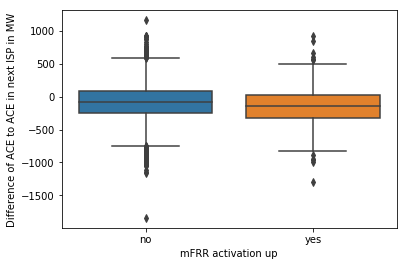

In [15]:
boxi = sns.boxplot(x= "mFRR activation up", y = "Difference of ACE to ACE in next ISP in MW", data = seven_sample_diff_with_mFRR)


pt.savefig("boxplot_under_cover_sample.pdf",bbox_inches='tight')


# Old: not included in revised version of Energy Policy manuscript

In [7]:
#new dataframe with positive imbalance
#imbalance_pos = GER_undercover.loc[GER_undercover["German ACE in MW"]>0]
#imbalance_pos_with_mFRR = imbalance_pos.loc[imbalance_pos["mFRR activation up"]=="yes"]
#imbalance_pos_without_mFRR = imbalance_pos.loc[imbalance_pos["mFRR activation up"]=="no"]

In [8]:
#new dataframe with positive imbalance over 1 GW
imbalance_pos_over_1GW = GER_undercover.loc[GER_undercover["German ACE in MW"]>1100]
imbalance_pos_over_1GW_with_mFRR = imbalance_pos_over_1GW.loc[imbalance_pos_over_1GW["mFRR activation up"]=="yes"]
imbalance_pos_over_1GW_without_mFRR = imbalance_pos_over_1GW.loc[imbalance_pos_over_1GW["mFRR activation up"]=="no"]


In [9]:
#new df with all ISPs with an pos imbalance over 1 GW but under 1,5 GW
imbalance_pos_1GW_to_1p5GW = imbalance_pos_over_1GW.loc[imbalance_pos_over_1GW["German ACE in MW"]<1200]
imbalance_pos_1GW_to_1p5GW_with_mFRR = imbalance_pos_1GW_to_1p5GW.loc[imbalance_pos_1GW_to_1p5GW["mFRR activation up"]=="yes"]
imbalance_pos_1GW_to_1p5GW_without_mFRR = imbalance_pos_1GW_to_1p5GW.loc[imbalance_pos_1GW_to_1p5GW["mFRR activation up"]=="no"]


In [10]:

#new dataframe with negative imbalance
imbalance_neg = GER_undercover.loc[GER_undercover["German ACE in MW"]<0]
imbalance_neg_with_mFRR = imbalance_neg.loc[imbalance_neg["mFRR activation down"]=="yes"]
imbalance_neg_without_mFRR = imbalance_neg.loc[imbalance_neg["mFRR activation down"]=="no"]

#new dataframe with positive imbalance over 1 GW
imbalance_neg_over_1GW = GER_undercover.loc[GER_undercover["German ACE in MW"]<-1200]
imbalance_neg_over_1GW_with_mFRR = imbalance_neg_over_1GW.loc[imbalance_neg_over_1GW["mFRR activation down"]=="yes"]
imbalance_neg_over_1GW_without_mFRR = imbalance_neg_over_1GW.loc[imbalance_neg_over_1GW["mFRR activation down"]=="no"]

#new df with all ISPs with an pos imbalance over 1 GW but under 1,5 GW
imbalance_neg_1GW_to_1p5GW = imbalance_neg_over_1GW.loc[imbalance_neg_over_1GW["German ACE in MW"]>-1600]
imbalance_neg_1GW_to_1p5GW_with_mFRR = imbalance_neg_1GW_to_1p5GW.loc[imbalance_neg_1GW_to_1p5GW["mFRR activation down"]=="yes"]
imbalance_neg_1GW_to_1p5GW_without_mFRR = imbalance_neg_1GW_to_1p5GW.loc[imbalance_neg_1GW_to_1p5GW["mFRR activation down"]=="no"]


### t test

In [ ]:
ttest_ind(imbalance_pos_1GW_to_1p5GW_with_mFRR["German ACE in MW"],
          imbalance_pos_1GW_to_1p5GW_without_mFRR["German ACE in MW"],equal_var=False)

In [ ]:
ttest_ind(imbalance_pos_1GW_to_1p5GW_with_mFRR["German ACE in MW"],
          imbalance_pos_1GW_to_1p5GW_without_mFRR["German ACE in MW"],equal_var=False)

In [ ]:
ttest_ind(imbalance_pos_1GW_to_1p5GW_with_mFRR["Difference of ACE to ACE in last ISP in MW"],
          imbalance_pos_1GW_to_1p5GW_without_mFRR["Difference of ACE to ACE in last ISP in MW"],equal_var=False)

In [ ]:
ttest_ind(imbalance_neg_1GW_to_1p5GW_with_mFRR["German ACE in MW"],
          imbalance_neg_1GW_to_1p5GW_without_mFRR["German ACE in MW"],equal_var=False)

In [ ]:
ttest_ind(imbalance_neg_1GW_to_1p5GW_with_mFRR["Difference of ACE to ACE in last ISP in MW"],
          imbalance_neg_1GW_to_1p5GW_without_mFRR["Difference of ACE to ACE in last ISP in MW"],equal_var=False)

In [ ]:
GER_undercover.corr()

### Analyse ISPs with positive imbalance

In [ ]:
GER_undercover.corr()

In [ ]:
imbalance_pos.describe()

In [ ]:
imbalance_pos_with_mFRR.describe()

In [ ]:
imbalance_pos_without_mFRR.describe()

In [ ]:
imbalance_pos_over_1GW.describe()

In [ ]:
imbalance_pos_over_1GW_with_mFRR.describe()

In [ ]:
imbalance_pos_over_1GW_without_mFRR.describe()

In [ ]:
imbalance_pos_1GW_to_1p5GW.describe()

In [ ]:
imbalance_pos_1GW_to_1p5GW_with_mFRR.describe()

In [ ]:
imbalance_pos_1GW_to_1p5GW_without_mFRR.describe()

### Analyse ISPs with negative imbalance

In [ ]:
imbalance_neg.corr()

In [ ]:
imbalance_neg.describe()

In [ ]:
imbalance_neg_with_mFRR.describe()

In [ ]:
imbalance_neg_without_mFRR.describe()

In [ ]:
imbalance_neg_over_1GW.describe()

In [ ]:
imbalance_neg_over_1GW_with_mFRR.describe()

In [ ]:
imbalance_neg_over_1GW_without_mFRR.describe()

In [ ]:
imbalance_neg_1GW_to_1p5GW.describe()

In [ ]:
imbalance_neg_1GW_to_1p5GW_with_mFRR.describe()

In [ ]:
imbalance_neg_1GW_to_1p5GW_without_mFRR.describe()

In [ ]:
sns.boxplot(x= "mFRR activation up", y = "German ACE in MW", data = imbalance_pos)

In [ ]:
sns.boxplot(x= "mFRR activation up", y = "Difference of ACE to ACE in last ISP in MW", data = imbalance_pos)

In [ ]:
sns.boxplot(x= "mFRR activation up", y = "German ACE in MW", data = imbalance_pos_1GW_to_1p5GW)

In [ ]:
sns.boxplot(x= "mFRR activation up", y = "Difference of ACE to ACE in last ISP in MW", data = imbalance_pos_1GW_to_1p5GW)

In [ ]:
sns.boxplot(x= "mFRR activation down", y = "German ACE in MW", data = imbalance_neg)

In [ ]:
sns.boxplot(x= "mFRR activation down", y = "Difference of ACE to ACE in last ISP in MW", data = imbalance_neg)

In [ ]:
sns.boxplot(x= "mFRR activation down", y = "German ACE in MW", data = imbalance_neg_1GW_to_1p5GW)

In [ ]:
sns.boxplot(x= "mFRR activation down", y = "Difference of ACE to ACE in last ISP in MW", data = imbalance_neg_1GW_to_1p5GW)